# Assigment HCI - Ferraud, Russo
## Analisi del dataset contenente dati sul mondo degli anime
In questo file è presente la nostra analisi dei dati contenuti nei file csv del dataset fornito, lo scopo è stato quello di dare un significato concreto ai numeri che trovavamo stampando grafici e colonne.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pip install matplotlib
%pip install geopandas
from datetime import datetime
import geopandas as gpd
from collections import Counter
from IPython.display import clear_output

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Qual'è il ruolo dei personaggi negli anime?
Come prima parte della nostra analisi abbiamo deciso di unire tutti i dati che in qualche modo ci davano informazioni sui personaggi (characters), dal file risultante abbiamo notato una colonna particolarmente interessante ovvero la colonna che riportava il ruolo dei personaggi nei rispettivi anime.
Analizzando quindi i dati contenuti nella colonna abbiamo realizzato il seguente grafico:

In [2]:
characterAW_df = pd.read_csv('character_anime_works.csv')
characterAW_df = characterAW_df.drop(columns=['character_name'])
characterAW_df.head()
characterNN_df = pd.read_csv('character_nicknames.csv')
characterNN_df.head()
character_df = pd.read_csv('characters.csv')
character_df = character_df.drop(columns=['url', 'name_kanji', 'image', 'about'])
character_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
character_df = pd.merge(character_df, characterAW_df, on='character_mal_id', how='left')
character_df = pd.merge(character_df, characterNN_df, on='character_mal_id', how='left')
character_df.drop_duplicates(subset=['character_mal_id'], inplace=True)
character_df.head()

,character_mal_id,name,favorites,anime_mal_id,role,nickname
0,280386.0,Envi Mel Champagne,0.0,59846.0,Supporting,NaN
1,280354.0,Eleven,0.0,60071.0,Supporting,NaN
2,280353.0,Stud,0.0,60071.0,Supporting,NaN
3,280352.0,Judge,0.0,60071.0,Supporting,NaN
4,280339.0,Eiji Kurokawa,0.0,60531.0,Supporting,NaN


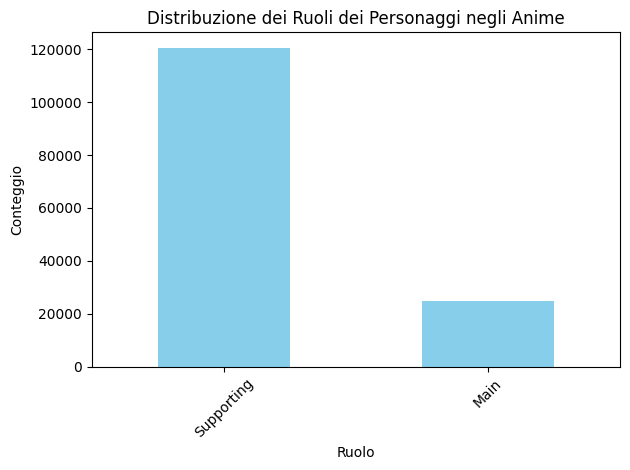

In [3]:
character_df['role'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribuzione dei Ruoli dei Personaggi negli Anime')
plt.xlabel('Ruolo')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Il grafico che abbiamo realizzato mostra semplicemente che il numero di personaggi secondari è di gran lunga maggiore rispetto al numero di personaggi protagonisti.  
Ovviamente questo dato è prevedibile e infatti preso singolarmente non ci direbbe nulla di interessante, per questo motivo abbiamo deciso di analizzare più a fondo questo dato combinandolo con la colonna in cui era riportato il valore 'favorites'.  
In questo modo abbiamo ottenuto il seguente grafico:

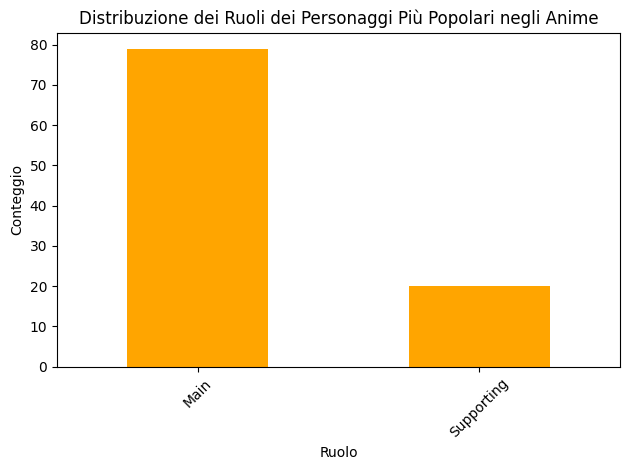

In [4]:
top100 = character_df.nlargest(100, 'favorites')
top100['role'].value_counts().plot(kind='bar', color='orange')

plt.title('Distribuzione dei Ruoli dei Personaggi Più Popolari negli Anime')
plt.xlabel('Ruolo')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grazie a questa analisi più appofondita (su un campione contenente i 100 personaggi più amati) possiamo vedere il grafico in modo completamente opposto a quello precedente e affermare che i protagonisti del mondo anime sono di gran lunga i più amati dai fan.   
In questo modo abbiamo analizzato i ruoli dei personaggi in due vesti, quantità e gradimento e analizzato in modo completo questo aspetto.  
Per confermare i dati presenti nel grafico abbiamo voluto riportare direttamente la tabella con i 10 personaggi più amati dal pubblico così da dare confermare la nostra analisi:

In [5]:
top10 = character_df.nlargest(10, 'favorites')
top10

,character_mal_id,name,favorites,anime_mal_id,role,nickname
321863,417.0,Lelouch Lamperouge,175632.0,56835.0,Supporting,Lelouch vi Britannia
324813,40.0,Luffy Monkey D.,145750.0,52139.0,Main,Mugiwara
230905,45627.0,Levi,144452.0,16498.0,Supporting,NaN
324292,71.0,L Lawliet,129333.0,1535.0,Main,Ryuga Hideki
324443,62.0,Zoro Roronoa,114319.0,52139.0,Main,Pirate Hunter
324988,27.0,Killua Zoldyck,99726.0,136.0,Main,Kil
324278,80.0,Light Yagami,98487.0,1535.0,Main,Kira
245528,35252.0,Rintarou Okabe,98037.0,9253.0,Main,Hououin Kyouma
325109,11.0,Edward Elric,89644.0,121.0,Main,Ed
325015,17.0,Naruto Uzumaki,86322.0,35072.0,Supporting,Nine-Tails Jinchuuriki


## Parliamo degli anime!
Dopo aver visto qualche curiosità sui personaggi il passaggio successivo è stato quello di concentrarci sugli anime stessi, dei quali siamo in possesso di molti dati interessanti e di vario tipo, per poter eseguire un'analisi.  
Possiamo iniziare visualizzando i 15 anime più amati dal pubblico, che oltre a farci capire quali opere siano, ci permette di fare delle considerazioni interessanti poichè alcune analisi possono indurci a pensare determiate cose ma che poi non sono propriamente veritiere.

In [6]:
details_df = pd.read_csv('details.csv')
pd.set_option('display.max_columns', None)
details_df = details_df.drop(columns=['url', 'title_japanese', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'source','rating','producers', 'explicit_genres', 'licensors', 'streaming'])
details_df['start_date'] = pd.to_datetime(details_df['start_date'])
details_df.drop_duplicates(subset=['mal_id'], inplace=True)
details_df.head()

,mal_id,title,type,status,score,scored_by,start_date,end_date,rank,popularity,favorites,genres,studios,episodes,season,year
0,59356,-Socket-,Movie,Finished Airing,NaN,NaN,2010-01-01 00:00:00+00:00,NaN,17086.0,22507,0,['Comedy'],[],1.0,NaN,NaN
1,56036,......,Music,Finished Airing,6.53,503.0,2023-06-11 00:00:00+00:00,NaN,NaN,15004,2,"['Horror', 'Supernatural']",['Flat Studio'],1.0,NaN,NaN
2,2928,.hack//G.U. Returner,OVA,Finished Airing,6.65,9745.0,2007-01-18 00:00:00+00:00,NaN,6366.0,5056,31,"['Adventure', 'Drama', 'Fantasy']",['Bee Train'],1.0,NaN,NaN
3,3269,.hack//G.U. Trilogy,Movie,Finished Airing,7.06,15373.0,2007-12-22 00:00:00+00:00,NaN,4194.0,4215,104,"['Action', 'Fantasy']",['CyberConnect2'],1.0,NaN,NaN
4,4469,.hack//G.U. Trilogy: Parody Mode,Special,Finished Airing,6.35,4317.0,2008-03-25 00:00:00+00:00,NaN,8182.0,6696,10,"['Comedy', 'Fantasy', 'Sci-Fi']",[],1.0,NaN,NaN


In [7]:
top_ranked = details_df.sort_values('favorites', ascending=False).head(15)[['title', 'favorites', 'rank', 'genres']]
top_ranked.reset_index(drop=True, inplace=True)
top_ranked.index = top_ranked.index + 1

top_ranked.style \
    .format({'rank': '{:.0f}'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
    ])

,title,favorites,rank,genres
1,One Piece,243358,55,"['Action', 'Adventure', 'Fantasy']"
2,Fullmetal Alchemist: Brotherhood,236754,2,"['Action', 'Adventure', 'Drama', 'Fantasy']"
3,Hunter x Hunter (2011),223927,7,"['Action', 'Adventure', 'Fantasy']"
4,Steins;Gate,198245,3,"['Drama', 'Sci-Fi', 'Suspense']"
5,Shingeki no Kyojin,183305,118,"['Action', 'Award Winning', 'Drama', 'Suspense']"
6,Death Note,181989,96,"['Supernatural', 'Suspense']"
7,Naruto: Shippuuden,118013,320,"['Action', 'Adventure', 'Fantasy']"
8,Code Geass: Hangyaku no Lelouch,114139,64,"['Action', 'Award Winning', 'Drama', 'Sci-Fi']"
9,Shinseiki Evangelion,114076,247,"['Action', 'Avant Garde', 'Award Winning', 'Drama', 'Sci-Fi', 'Suspense']"
10,Kimi no Na wa.,94186,32,"['Award Winning', 'Drama']"


### Quali sono i generi più presenti nel mondo anime?
Nella tabella mostrata in precedenza abbiamo volutamente lasciato la colonna 'genres' per poterci collegare in modo coerente ai dati del nuovo file, andiamo quindi ad analizzare quali sono i generi più amati aiutandoci con un grafico.  
Il nostro scopo è quello di capire quale categoria o genere sia il più popolare in termini di numero di anime presenti sul mercato.

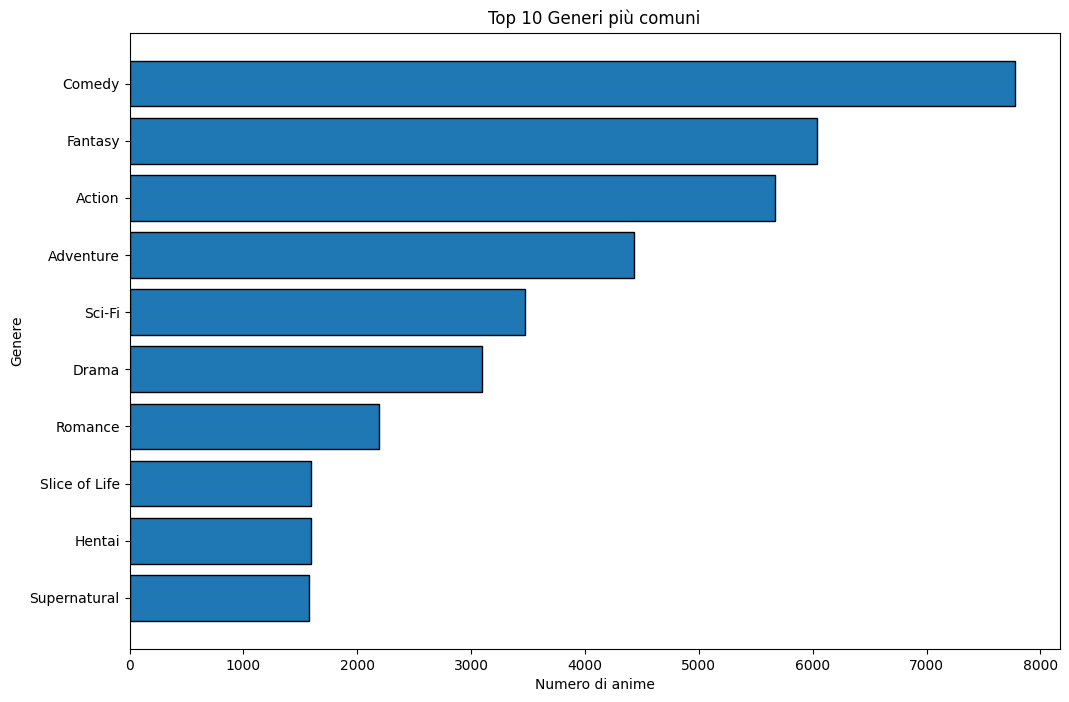

In [8]:
all_genres = []
for gen in details_df['genres'].dropna():
    genres_list = gen.split(', ')
    for g in genres_list:
        cleaned = g.strip("[]'\"")
        if cleaned:
            all_genres.append(cleaned)

genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)
plt.figure(figsize=(12, 8))
plt.barh(genres, counts, edgecolor='black')
plt.title('Top 10 Generi più comuni')
plt.xlabel('Numero di anime')
plt.ylabel('Genere')
plt.gca().invert_yaxis()
plt.show()

Grazie al grafico possiamo avere un'idea dei generi principali degli anime, il principale è la commedia con un discreto distacco dagli altri, quindi i film e le serie più prodotte sono generalmente divertenti e a scopo di intrattenimento.
Questo dato è interessante perchè può indirettamente mostrarci la direzione del mercato degli anime, si può presumere che la commedia sia il genere più apprezzato se ci basiamo sulla regola della domanda e della offerta.  
Invece però possiamo notare come ad esempio nei 10 anime più apprezzati non è presente il genere commedia, ma dominano il genere fantasy e action; è molto curiosa questa analisi perchè sebbene il genere commedia sia il piu prodotto/richiesto non ci sono anime di tale genere che spiccano particolarmente. 
Quindi si può dedurre che i produttori preferiscono basarsi di più su un genere che possa interessare a più persone possibili anche se non è il più apprezzato.

### Quali sono i tipi degli anime?

Dopo aver analizzato i generi degli anime, ora possiamo analizzare com'è la distribuzione dei tipi degli anime, andando a capire se sono principalmente serie tv o altro.

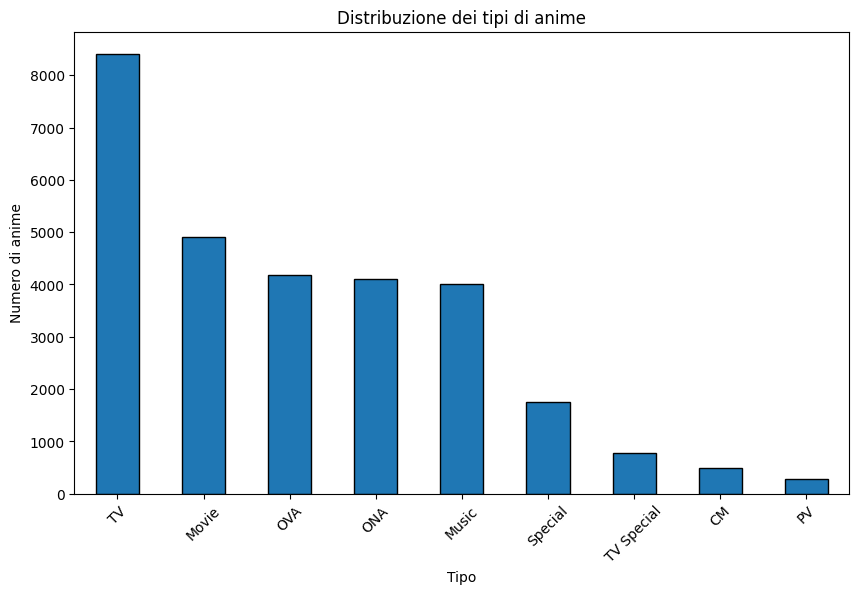

In [9]:
plt.figure(figsize=(10, 6))
details_df['type'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribuzione dei tipi di anime')
plt.xlabel('Tipo')
plt.ylabel('Numero di anime')
plt.xticks(rotation=45)
plt.show()

Da questo grafico possiamo notare come le serie TV siano le più prodotte con un margine abbastanza considerevole, seguito dai movie, OVA, ONA e music che hanno un numero abbastanza simile. Grazie a questa analisi possiamo fare una considerazione, ovvero che vengono prodotte più serie tv in modo da poter fare più episodi e avere sempre in modo costate qualcosa di nuovo da guardare poichè per produrre una serie ci vuole meno tempo e soldi rispetto ad un movie (es. One Piece viene prodotto regolarmente ogni settimana).  


### I voti più alti sono meritati?

Adesso invece possiamo chiederci se gli anime più apprezzati sono anche i più votati, ci serve per capire se le valutazioni più alte degli anime sono così perchè sono stati votati da poche persone con un voto generoso oppure se il voto è condiviso da tante persone e quindi è meritato.

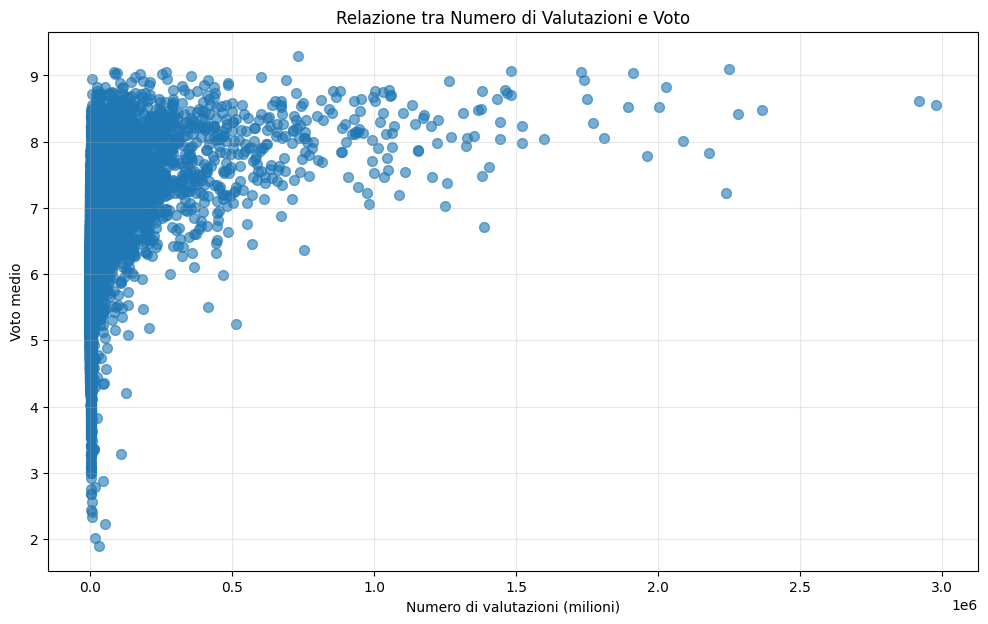

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(details_df['scored_by'], details_df['score'], alpha=0.6, s=50)
plt.xlabel('Numero di valutazioni (milioni)')
plt.ylabel('Voto medio')
plt.title('Relazione tra Numero di Valutazioni e Voto')
plt.grid(True, alpha=0.3)
plt.show()

Si, possiamo notare in modo chiaro come generalmente gli anime che hanno una valutazione molto alta sono tra i più votati, anche se la maggior parte non superano i 500.000 voti. Mentre invece quelli che hanno milioni di voti sono anche i più graditi, quindi possiamo dedurre come gli anime con un voto molto alto generalmente sono stai votati da tante persone e quindi è un voto meritato, salvo alcune eccezzioni che possono sempre capitare.

### Qual è il periodo d'oro degli anime?

Una domanda molto interessante è capire in quali anni c'è stato il boom degli anime, ovvero in quali anni sono stati prodotti più anime e in quale periodo storico, per chiederci come mai sia successo propio in quel periodo, quali sono le cause.

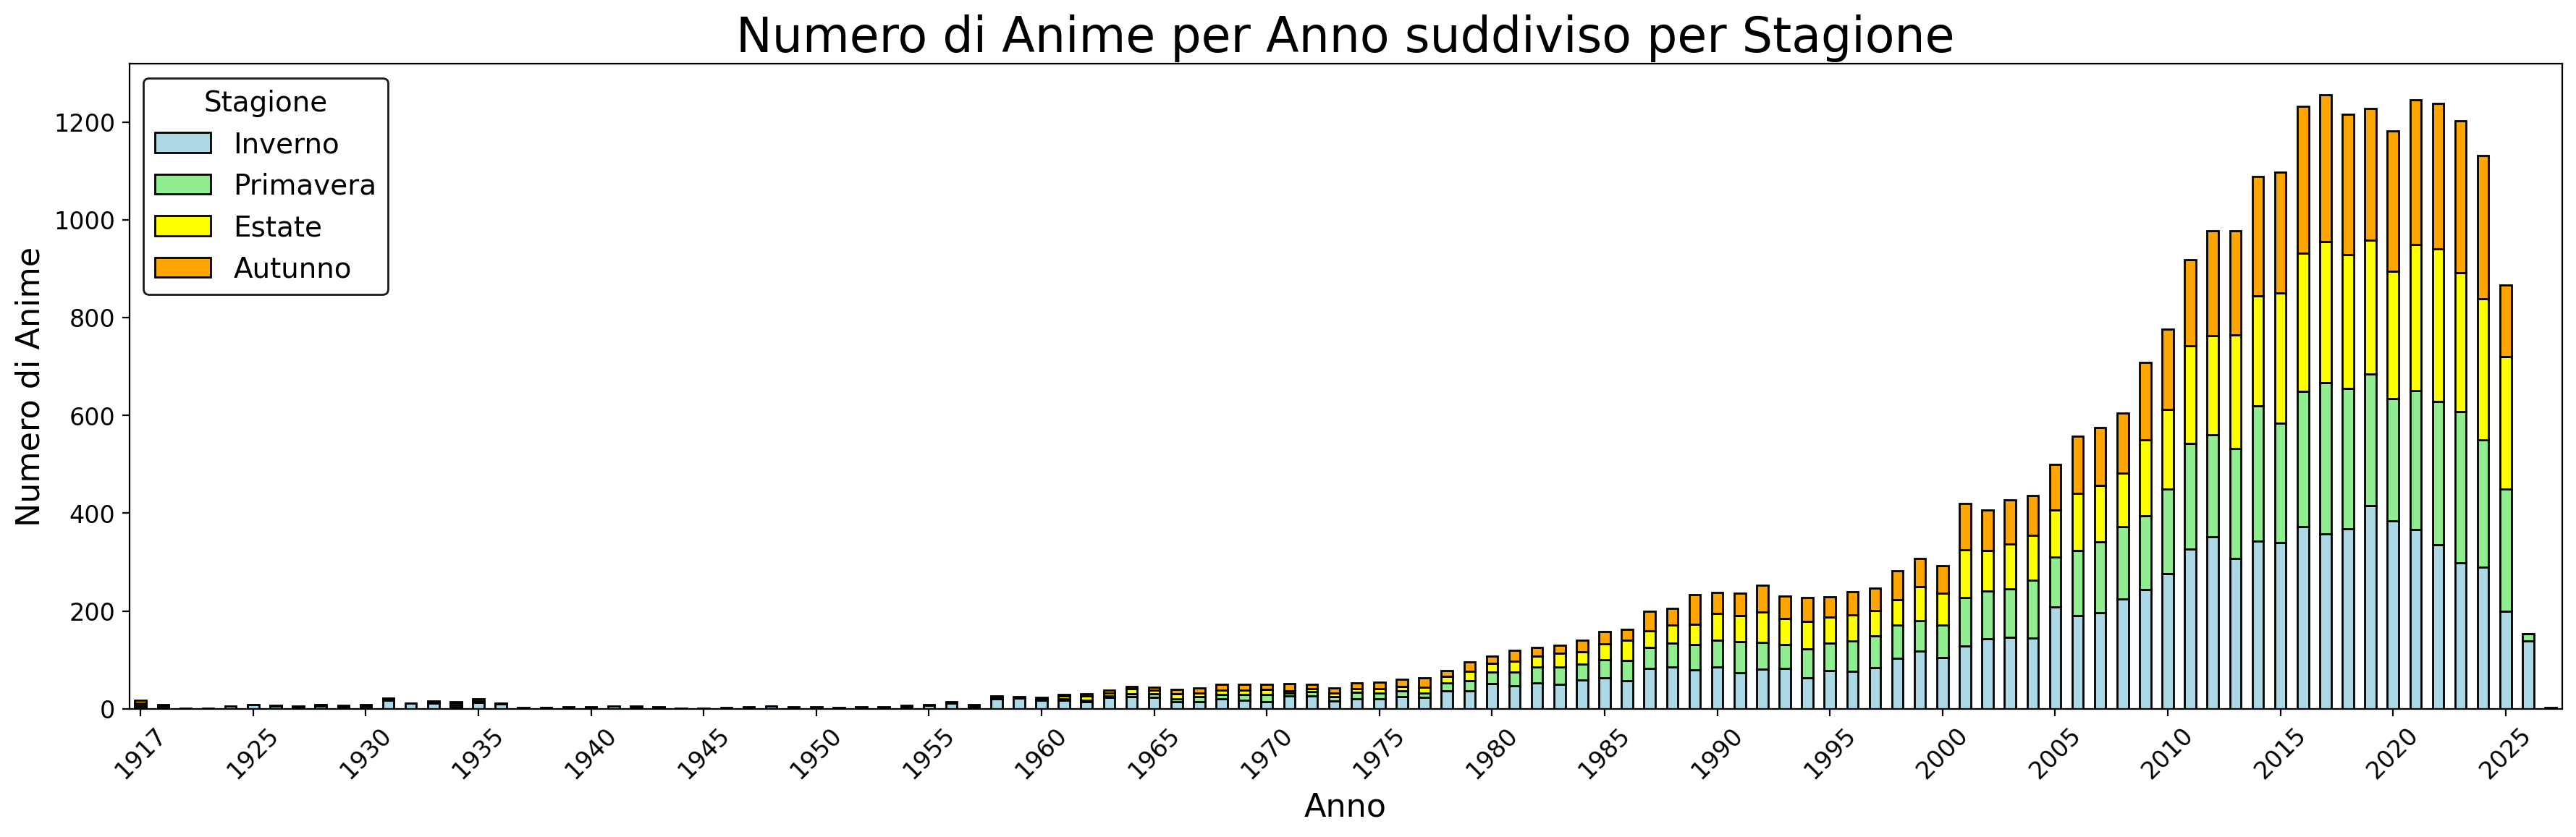

In [26]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    else:
        return 'Autunno'

details_df['season'] = details_df['start_date'].dt.month.apply(get_season)

anime_per_anno_stagione = details_df.groupby([details_df['start_date'].dt.year, 'season']).size().unstack(fill_value=0)

stagioni_ordine = ['Inverno', 'Primavera', 'Estate', 'Autunno']
anime_per_anno_stagione = anime_per_anno_stagione[[s for s in stagioni_ordine if s in anime_per_anno_stagione.columns]]

plt.close()
plt.rcParams.update({'font.size': 14})
title_fs = 24
label_fs = 16
tick_fs = 12
legend_fs = 14
fig, ax = plt.subplots(figsize=(18, 6))
anime_per_anno_stagione.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'yellow', 'orange'], edgecolor='black', ax=ax)
ax.set_title('Numero di Anime per Anno suddiviso per Stagione', fontsize=title_fs)
ax.set_xlabel('Anno', fontsize=label_fs)
ax.set_ylabel('Numero di Anime', fontsize=label_fs)
years = anime_per_anno_stagione.index.tolist()
ax.set_xticks(range(0, len(years), 5))
ax.set_xticklabels([str(int(years[i])) for i in range(0, len(years), 5)], rotation=45, fontsize=tick_fs)
ax.tick_params(axis='y', labelsize=tick_fs)
legend = ax.legend(title='Stagione', loc='upper left', fontsize=legend_fs, framealpha=0.9)
legend.get_title().set_fontsize(legend_fs)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
img_path = 'anime_by_year_season.png'
fig.savefig(img_path, dpi=200, bbox_inches='tight')
from IPython.display import Image, display
display(Image(filename=img_path))
plt.close(fig)

Da questo grafico possiamo notare come il periodo d'oro degli anime sia iniziato dal 2000 fino ad oggi raggiungendo i numeri più alti dal 2010 in poi. Ovviamente è presente un calo nel 2025 e negli anni successivi poichè sono presenti degli anime che sono stati già annunciati e che verranno trasmessi in futuro, ma non tutti annunciano una data d'uscita anni prima.  
Infatti solitamente la maggior parte delle serie vengono annunciate pochi mesi prima della loro uscita (le uscite degli anime vanno a stagioni, salvo alcune eccezioni). Inoltre possiamo notare come in inverno in numero delle uscite sia maggiore rispetto alle altre.

### Piccola curiorità
Un dato che ci ha incuriosito è sapere quali studi producono più anime, e in base a ciò possiamo capire anche da che stati vengono fisicamente prodotti gli anime.

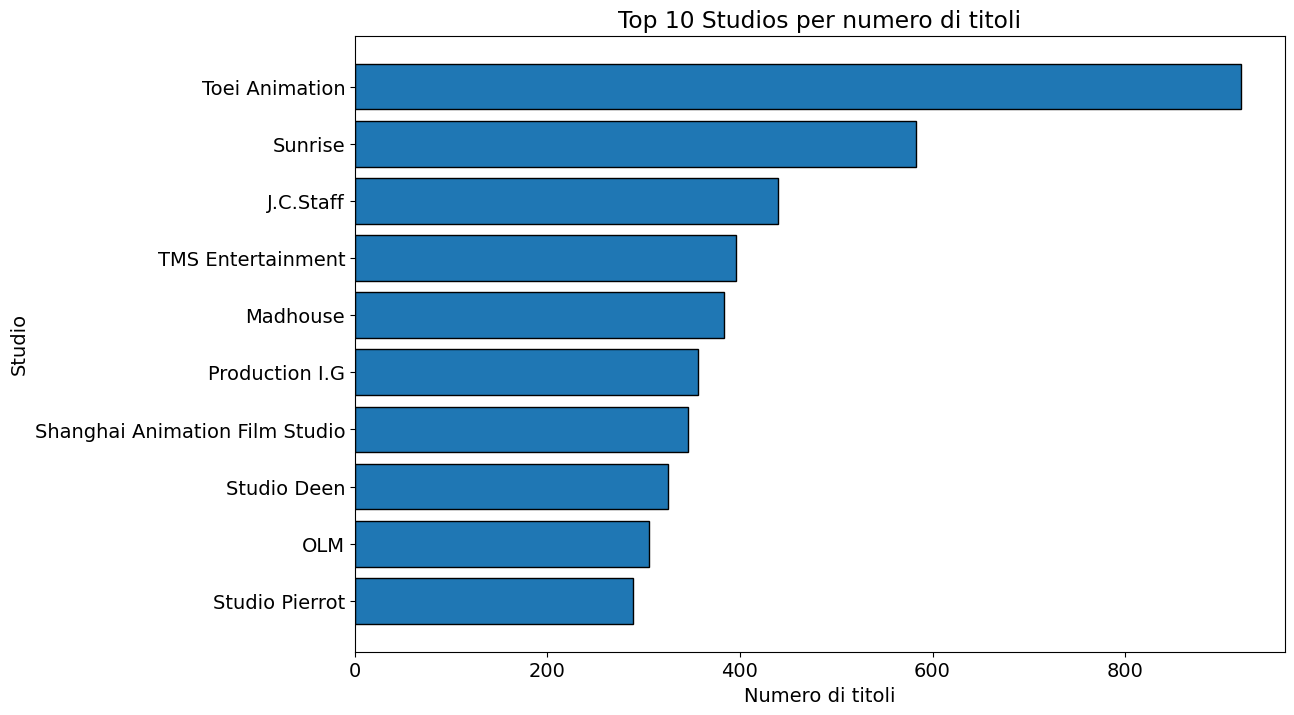

In [12]:
from collections import Counter
all_studios = []
for studios in details_df['studios'].dropna():
    studios_list = studios.split(', ')
    for s in studios_list:
        cleaned = s.strip("[]'\"")  
        if cleaned:  
            all_studios.append(cleaned)

studios_counts = Counter(all_studios)
top_studios = studios_counts.most_common(10)


studios, counts = zip(*top_studios)
plt.figure(figsize=(12, 8))
plt.barh(studios, counts, edgecolor='black')
plt.title('Top 10 Studios per numero di titoli')
plt.xlabel('Numero di titoli')
plt.ylabel('Studio')
plt.gca().invert_yaxis()  
plt.show()

Posssiamo notare come lo studio che ha prodotto più titoli con un grande distacco sia "Toei Animation" ed infatti è un famosissimo studio presente in giappone (patria degli anime).  
Inoltre come ci si poteva aspettare tutti gli studi principali sono giapponesi tranne "Shangai Animation Film Studio" che è situato in cina.

# Favs
Analizziamo adesso il file favs.csv nel quale sono segnati i dati per ogni utente.
Secondo me è inutile analizzare favs (per lo meno da solo) perchè ci dice per ogni utente la sua libreria dei preferiti.

# Person
Analisi dei file legati alle persone che hanno lavorato agli anime nel corso degli anni.
Grazie ai dati contenuti in questo file possiamo ricavare informazioni interessanti sulle persone che lavorano dietro le quinte del mondo anime, per esempio età e luogo in cui sono nati.

In [13]:
person_df = pd.read_csv('person_details.csv')
person_df = person_df.drop(columns=['url', 'website_url', 'image_url', 'given_name', 'family_name'])
person_df.drop_duplicates()
person_df.dropna()
person_df['birthday'] = pd.to_datetime(person_df['birthday'], format='ISO8601', errors='coerce')
person_df.head()

,person_mal_id,name,birthday,favorites,relevant_location
0,1,Tomokazu Seki,1972-09-08 00:00:00+00:00,6219,"Berlin, Germany"
1,2,Tomokazu Sugita,1980-10-11 00:00:00+00:00,47666,"Los Angeles, USA"
2,3,Satsuki Yukino,1970-05-25 00:00:00+00:00,1777,"Madrid, Spain"
3,4,Aya Hirano,1987-10-08 00:00:00+00:00,18374,"Paris, France"
4,5,Kenichi Suzumura,1974-09-12 00:00:00+00:00,5176,"Osaka, Japan"


Essendo presente nel file una colonna contenenete la data di nascita degli operatori ci viene spontaneo interessarci alla distribuzione dei dati stessi per capire qual'è l'età media delle persone che lavorano alla produzione di anime.

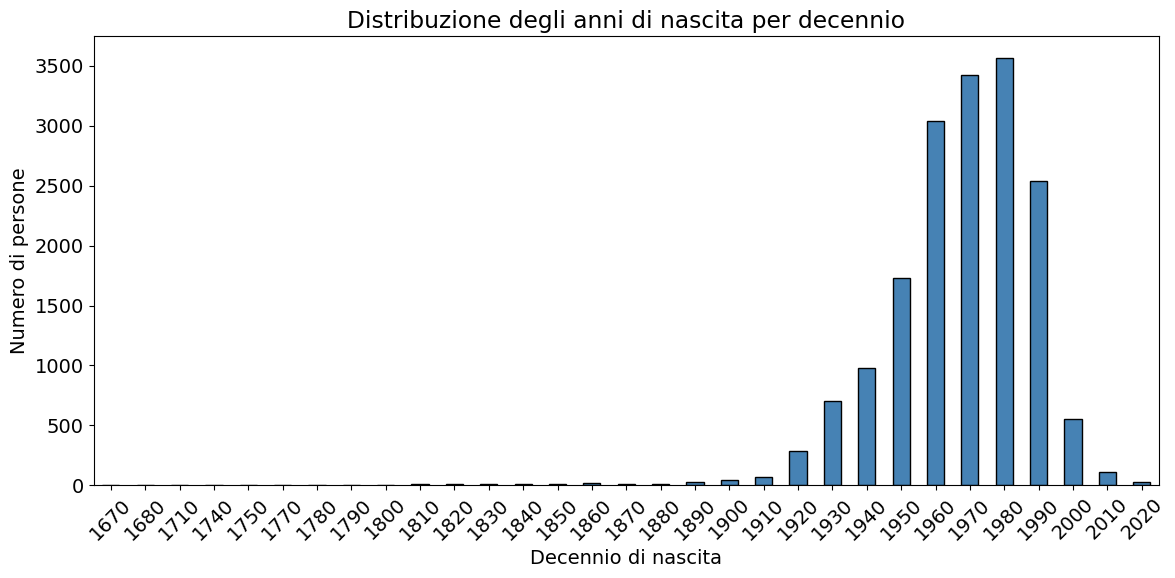

In [14]:
plt.figure(figsize=(12, 6))
person_df['decade'] = (person_df['birthday'].dt.year // 10 * 10).astype('Int64')
person_df['decade'].value_counts().sort_index().plot(kind='bar', edgecolor='black', color='steelblue')
plt.title('Distribuzione degli anni di nascita per decennio')
plt.xlabel('Decennio di nascita')
plt.ylabel('Numero di persone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dal grafico vediamo subito alcuni dati che si discostano dal centro arrivando addirittura al 1770, ed è impossibile pensare che in quel periodo storico esistesse già qualcuno che lavorasse a questo mondo.
Cerchiamo quindi di capire come mai sono registrate queste persone.

In [15]:
oldest_person = person_df.loc[person_df['birthday'].idxmin()]
oldest_person

person_mal_id                            24939
name                     Antonio Lucio Vivaldi
birthday             1678-03-04 00:00:00+00:00
favorites                                   99
relevant_location                New York, USA
decade                                    1670
Name: 17765, dtype: object

Dopo aver analizzato i dati abbiamo pensati di lasciare come esempio il caso di Antonio Vivaldi, questo esempio è perfetto per farci capire che le persone registrate in quegli anni non appartenenvano al mondo degli anime ma alcuni loro lavori si possono trovare nei film o nelle serie, in questo caso si tratta probabilmente di colonne sonore essendo stato Vivaldi un compositore.

# person works

In [16]:
personAW_df = pd.read_csv('person_anime_works.csv')
personAW_df = personAW_df.drop(columns=['anime_mal_id'])
personAW_df.drop_duplicates(subset=['person_mal_id'], inplace=True)
personAW_df.head()
personVW_df = pd.read_csv('person_voice_works.csv')
personVW_df = personVW_df.drop(columns=['anime_mal_id', 'character_mal_id'])
personVW_df.head()
# Merge sequentially (fix typo 'hoew' -> 'how' and don't pass three dataframes to pd.merge)
personVW_df = pd.merge(personVW_df, personAW_df, on='person_mal_id', how='left')
personVW_df.drop_duplicates(subset=['person_mal_id'], inplace=True)
personVW_df.head()

,person_mal_id,role,language,position
0,1,Main,Japanese,Theme Song Performance
524,2,Supporting,Japanese,Theme Song Performance
1185,3,Supporting,Japanese,Theme Song Performance
1482,4,Supporting,Japanese,Theme Song Performance (ED10)
1673,5,Main,Japanese,Theme Song Performance


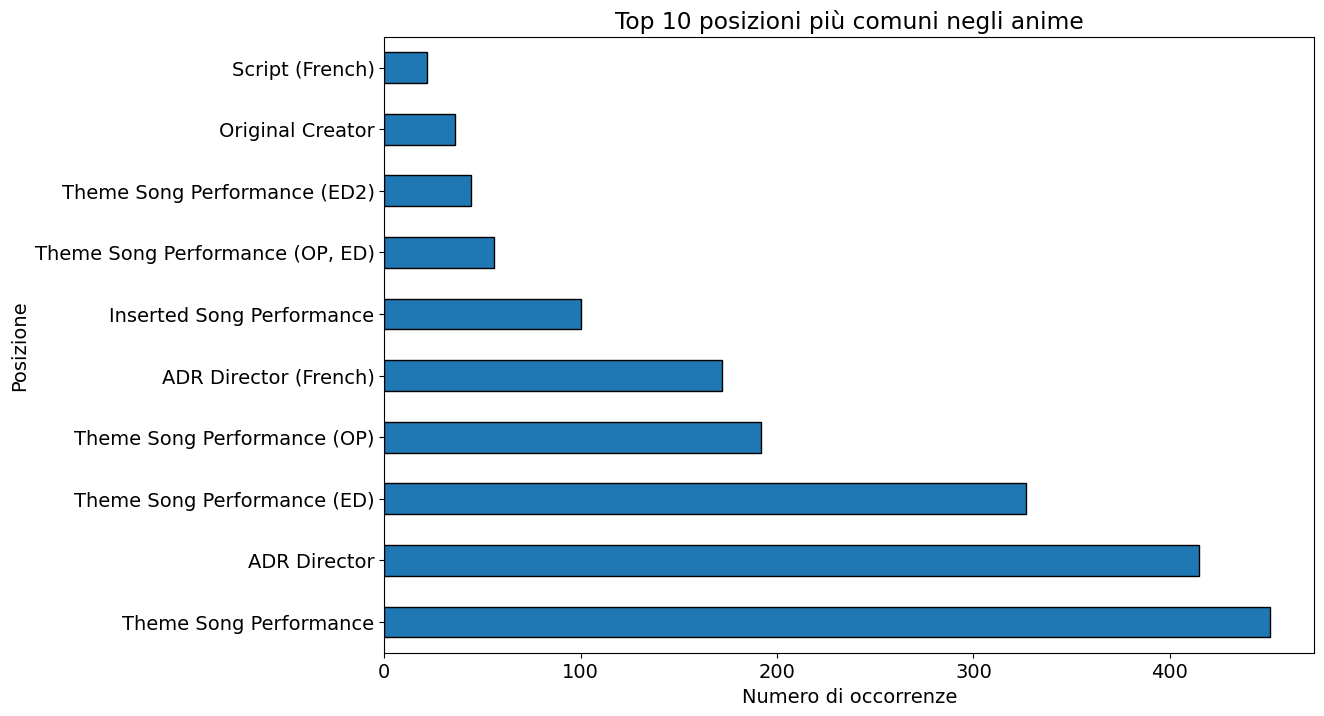

In [17]:
plt.figure(figsize=(12, 8))
personVW_df['position'].value_counts().head(10).plot(kind='barh', edgecolor='black')
plt.title('Top 10 posizioni più comuni negli anime')
plt.xlabel('Numero di occorrenze')
plt.ylabel('Posizione')
plt.show()

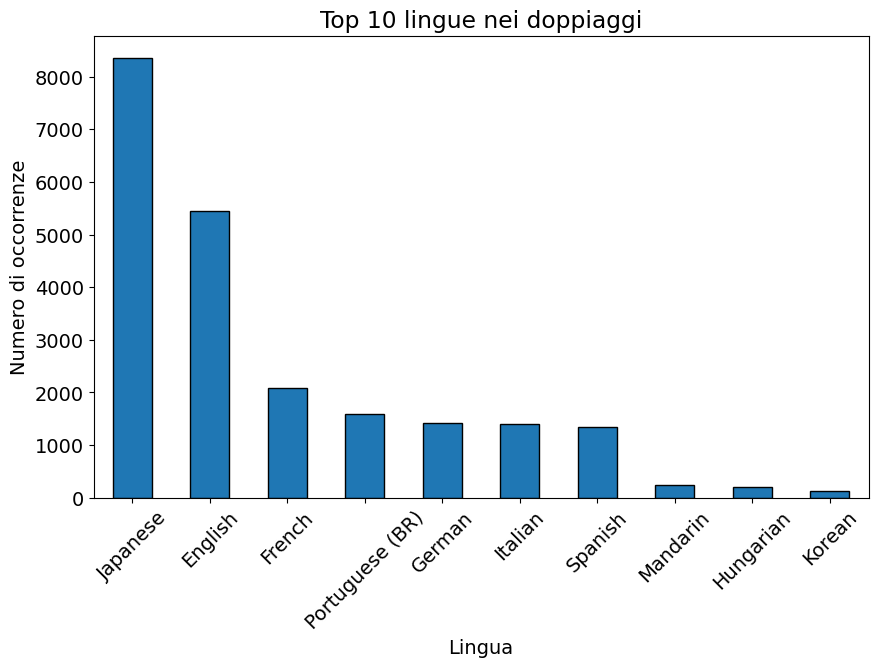

In [18]:
plt.figure(figsize=(10, 6))
personVW_df['language'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 lingue nei doppiaggi')
plt.xlabel('Lingua')
plt.ylabel('Numero di occorrenze')
plt.xticks(rotation=45)
plt.show()

Come possiamo vedere la lingua giapponese è la più comne (Molto prevedible) però possiamo notare come l'ingelse è sopra la metà e ha molto distacco anche delle altre lingue.

In [19]:
profile = pd.read_csv('profiles.csv')
profile = profile.drop(columns=['watching', 'completed', 'on_hold', 'dropped', 'plan_to_watch'])
profile = profile.drop_duplicates()
profile = profile.dropna()
profile.head()

,username,gender,birthday,location,joined
15,RinsAl,Male,"Jul 7, 1989",Japan,"Oct 19, 2009"
19,ishimori,Female,"Apr 17, 2000",France,"Dec 7, 2018"
25,Rins_,Male,"Jul 15, 1988",Japan,"Jun 6, 2013"
29,FollowValen,Male,"Jul 8, 1996",Spain,"Oct 7, 2018"
30,ishiruchan,Female,"Jun 16, 2003",China,"Aug 26, 2018"


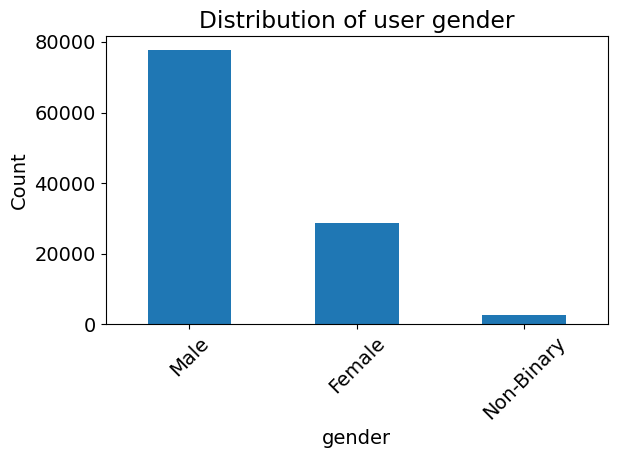

In [20]:
genere = profile
genere = genere.drop(columns=['birthday', 'location', 'joined'])
genere = genere.drop_duplicates()
genere = genere.dropna()
genere['gender'].value_counts().plot(kind='bar')
plt.title('Distribution of user gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Possimo notare come il pubblico è prevalentemente maschile. Però ci possiamo chedere com'è l'andamento degli utenti negli anni per capire se il genere femminile è in aumento oppure i non-binary.

<Figure size 1200x600 with 0 Axes>

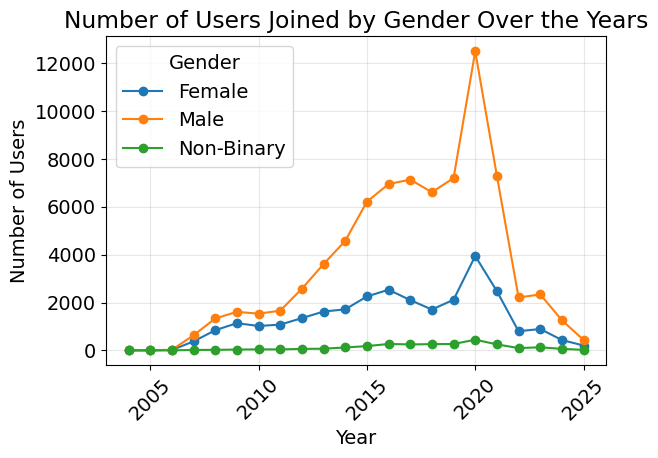

In [21]:
# Count users by year and gender
profile['joined'] = pd.to_datetime(profile['joined'])
users_by_year_gender = profile.groupby([profile['joined'].dt.year, 'gender']).size().unstack(fill_value=0)

# Plotting - Grafico a linee per vedere chiaramente il trend di ogni genere
plt.figure(figsize=(12, 6))
users_by_year_gender.plot(kind='line', marker='o')
plt.title('Number of Users Joined by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Possimao subito notare un picco di iscrizioni in tutte e tre le categorie nel 2020 (anno del COVID), e l'andamento è simile per tutti quindi non ci sono generi in aumento o in calo. Inoltre possiamo vedere come negli ultimi anni c'è stato un calo considerevole ma è plausibile perchè le persone sono già iscrtitte precedentemente.

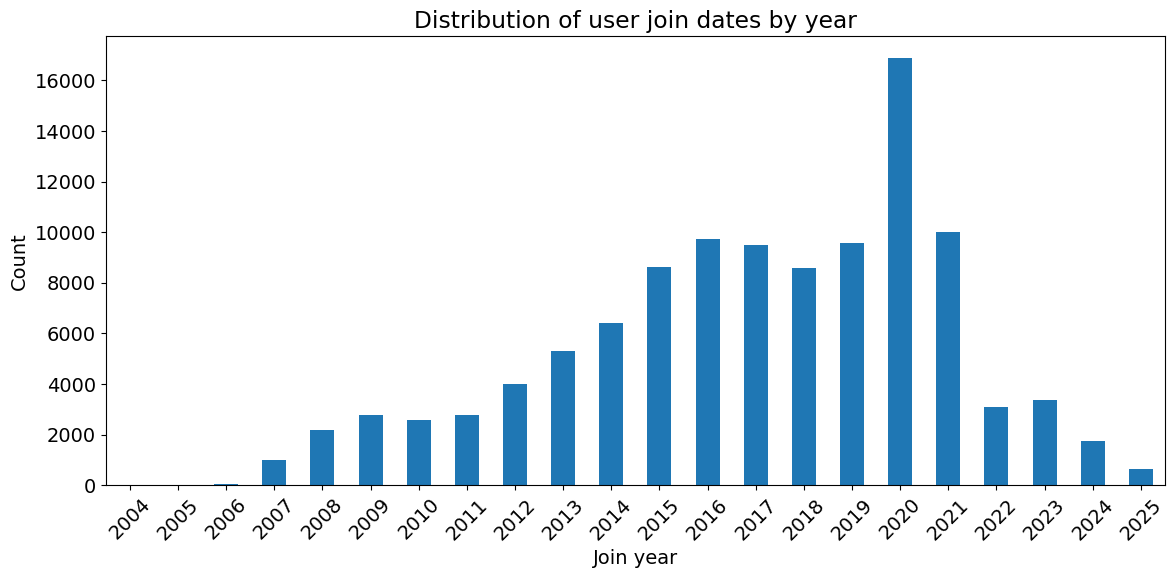

In [22]:
iscrizioni = profile.drop(columns=['gender', 'birthday', 'location'])
iscrizioni = iscrizioni.drop_duplicates()
iscrizioni = iscrizioni.dropna()

# Convert 'joined' to datetime and extract year
iscrizioni['joined_dt'] = pd.to_datetime(iscrizioni['joined'], errors='coerce')
iscrizioni = iscrizioni.dropna(subset=['joined_dt']).copy()
iscrizioni['join_year'] = iscrizioni['joined_dt'].dt.year.astype(int)

# Plot distribution by year
year_counts = iscrizioni['join_year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of user join dates by year')
plt.xlabel('Join year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

possiamo vedere come i dati combaciano abbastanza con il grafico precedente, con iìun picco nel 2020

Ora per curiosità possiamo visualizzare qual'è la distribuxione dell'età degli utenti

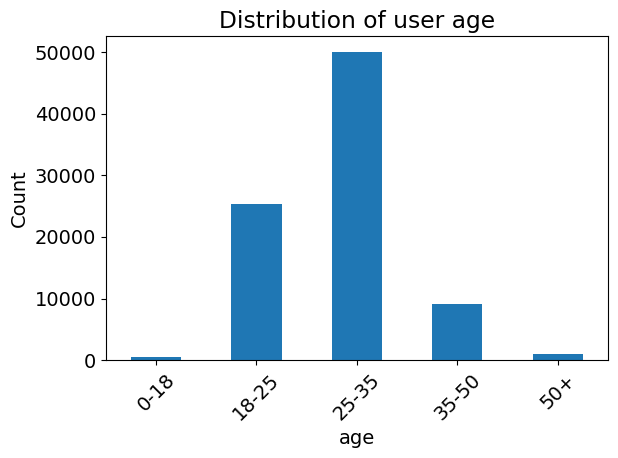

In [23]:
età = profile
età = età.drop(columns = ['gender', 'location', 'joined'])
età = età.drop_duplicates()
età = età.dropna()

# Extract 4-digit year from 'birthday' strings (some entries lack year e.g. "Aug 4")
età['birth_year'] = età['birthday'].astype(str).str.extract(r'(\d{4})')[0].astype(float)

# Keep only rows with a valid year and compute age
età = età.dropna(subset=['birth_year']).copy()
current_year = datetime.now().year
età['age'] = current_year - età['birth_year']

# Define bins and labels for age groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '18-25', '25-35', '35-50', '50+']

# Create age groups
età['age_group'] = pd.cut(età['age'], bins=bins, labels=labels, right=False)

età['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of user age')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Possiamo notare come la fascia d'età principale è di 25-35 anni. Possiamo notare acnhe una cosa più curiosa, ovvero gli over 50 sono di più rispetto agli under 18.
Infine possiamo vedere da quali paesi provengono principalmente gli utenti.

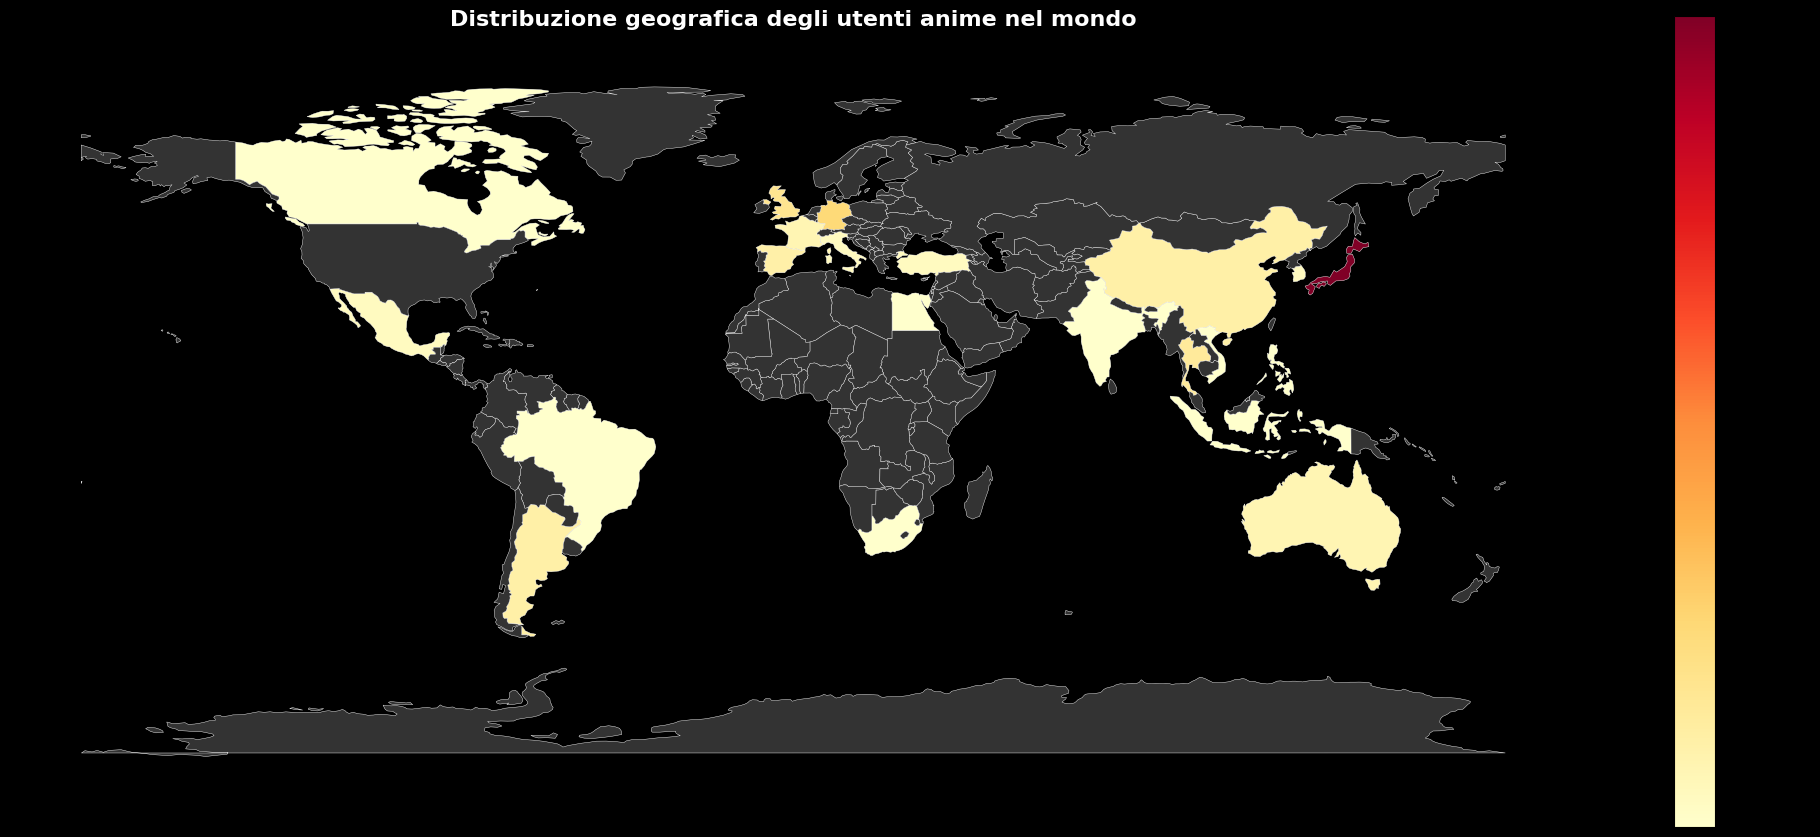

In [24]:
GeoJSON = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
world = gpd.read_file(GeoJSON)

# Clean names
profile['location'] = profile['location'].astype(str).str.strip()
world['name'] = world['name'].str.strip()

# Aggregate counts of users per country and create the 'value' column
location_counts = profile['location'].value_counts().reset_index()
location_counts.columns = ['name', 'value']
location_counts['name'] = location_counts['name'].str.strip()

# Merge aggregated data (counts) into the GeoDataFrame
world_data = world.merge(location_counts, how='left', on='name')

fig, ax = plt.subplots(figsize=(20, 12), facecolor='black')
ax.set_facecolor('black')

world_data.plot(
    column="value",
    cmap="YlOrRd",
    legend=True,
    legend_kwds={
        "label": "Numero di utenti",
        "orientation": "vertical",
        "shrink": 0.7
    },
    missing_kwds={
        "color": "#333333",
        "label": "Dati non disponibili"
    },
    edgecolor="white",
    linewidth=0.3,
    ax=ax
)

ax.set_title("Distribuzione geografica degli utenti anime nel mondo", fontsize=16, fontweight='bold', pad=20, color='white')
ax.set_axis_off()

# Cambia il colore della colorbar
try:
    cbar = ax.collections[0].colorbar
    if cbar:
        cbar.ax.tick_params(colors='white')
        cbar.ax.yaxis.label.set_color('white')
except:
    pass

plt.tight_layout()
plt.show()

Come possiamo vedere dalla mappa il giappone (patria degli anime) è il paese in cui ci sono più utenti in assoluto, altri paesi che vale la pena citare sono cina, australia, europa e alcune zone americane.

# Analizziamo il file stats.csv

In [25]:
statsDF = pd.read_csv('stats.csv')
statsDF = statsDF.drop_duplicates(subset=['mal_id'])
statsDF = statsDF.dropna()
name = details_df
name = name.drop(columns=['title_japanese', 'url', 'image_url', 'type', 'status', 'score', 'scored_by', 'start_date', 'end_date', 'synopsis', 'rank', 'popularity', 'members', 'favorites', 'genres', 'studios', 'themes', 'demographics', 'source', 'rating', 'episodes', 'season', 'year', 'producers', 'explicit_genres', 'licensors', 'streaming'])
statsDF = pd.merge(statsDF, name, left_on='mal_id', right_on='mal_id', how='left')
statsDF.head()

completed_anime = statsDF
completed_anime = completed_anime.drop(columns=['watching', 'on_hold', 'dropped', 'plan_to_watch', 'total', 'score_1_votes', 'score_1_percentage', 'score_2_votes', 'score_2_percentage', 'score_3_votes', 'score_3_percentage', 'score_4_votes', 'score_4_percentage', 'score_5_votes', 'score_5_percentage', 'score_6_votes', 'score_6_percentage', 'score_7_votes', 'score_7_percentage', 'score_8_votes', 'score_8_percentage', 'score_9_votes', 'score_9_percentage', 'score_10_votes', 'score_10_percentage'])
completed_anime = completed_anime.nlargest(5, 'completed')
completed_anime.head()
statsDF.head()


KeyError: "['title_japanese', 'url', 'image_url', 'synopsis', 'members', 'themes', 'demographics', 'source', 'rating', 'producers', 'explicit_genres', 'licensors', 'streaming'] not found in axis"